In [95]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn
plt.style.use("seaborn")

In [96]:
df=pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\train.csv",encoding="latin1")

In [97]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [98]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [99]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [100]:
df.shape

(20114, 5)

In [101]:
df.isnull().sum()

id           0
title      542
author    1903
text        37
label        0
dtype: int64

In [102]:
df=df.dropna()

In [103]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [104]:
df.shape

(17669, 5)

In [105]:
X=df.iloc[:,1:4]
Y=df["label"]

In [106]:
X.head()

,title,author,text
0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

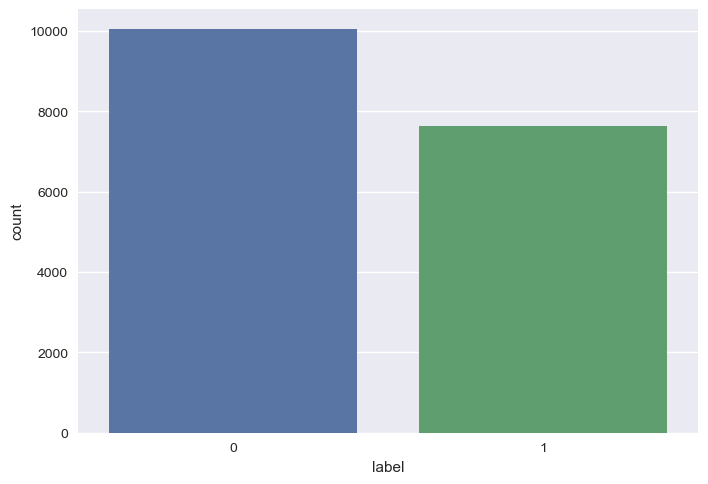

In [107]:
sns.countplot(df["label"])

In [108]:
Y.unique()

array([1, 0], dtype=int64)

In [109]:
import tensorflow as tf

In [110]:
tf.__version__

'2.12.0'

In [111]:
voc_size=5000

In [112]:
messages=X.copy()
messages.reset_index(inplace=True)
messages["title"][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [113]:
import nltk 
import re
from nltk.corpus import stopwords

In [114]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [115]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review=re.sub("[^a-zA-Z]"," ",messages["title"][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word  in review  if not word  in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [116]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hillari',
 'chuck todd buzzfe donald trump polit favor breitb

In [117]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [118]:
onehot=[one_hot(words,voc_size) for words in corpus ]

In [119]:
sent_length=20
embedded_docs=pad_sequences(onehot,padding="pre",maxlen=sent_length)

In [120]:
embedded_docs

array([[   0,    0,    0, ..., 2892, 2588, 3850],
       [   0,    0,    0, ..., 3760,  231, 1676],
       [   0,    0,    0, ..., 3217, 2861, 4284],
       ...,
       [   0,    0,    0, ..., 1347, 1875, 4428],
       [   0,    0,    0, ..., 4333, 3831, 4206],
       [   0,    0,    0, ..., 3584, 4885, 3969]])

In [121]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(Y)

In [122]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final, test_size=0.33,random_state=0)

In [124]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
185/185 [==============================] - 11s 47ms/step - loss: 0.3473 - accuracy: 0.8449 - val_loss: 0.2023 - val_accuracy: 0.9151
Epoch 2/10
185/185 [==============================] - 9s 48ms/step - loss: 0.1426 - accuracy: 0.9440 - val_loss: 0.2003 - val_accuracy: 0.9160
Epoch 3/10
185/185 [==============================] - 9s 47ms/step - loss: 0.0976 - accuracy: 0.9640 - val_loss: 0.2149 - val_accuracy: 0.9163
Epoch 4/10
185/185 [==============================] - 9s 48ms/step - loss: 0.0704 - accuracy: 0.9761 - val_loss: 0.2708 - val_accuracy: 0.9017
Epoch 5/10
185/185 [==============================] - 8s 45ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.2789 - val_accuracy: 0.9137
Epoch 6/10
185/185 [==============================] - 6s 31ms/step - loss: 0.0320 - accuracy: 0.9915 - val_loss: 0.4122 - val_accuracy: 0.9088
Epoch 7/10
185/185 [==============================] - 7s 36ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.3898 - val_accuracy: 0.914

In [125]:
y_pred=model.predict(X_test)
y_pred

183/183 [==============================] - 3s 14ms/step


array([[0.9990653 ],
       [0.6935793 ],
       [0.00849234],
       ...,
       [0.9999605 ],
       [0.99989086],
       [0.9999759 ]], dtype=float32)

In [126]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred

183/183 [==============================] - 3s 14ms/step


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3333,    0],
       [2498,    0]], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

57.16000685988681

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], df["label"], test_size=0.2, random_state=7)

In [131]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [132]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style
def determine_optimal_clusters(tfidf_matrix):
    sse = []
    silhouette_scores = []

    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(tfidf_matrix)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))
    return sse, silhouette_scores

In [133]:
k=determine_optimal_clusters(X_train)

In [134]:
k

([257786393150.12827,
  236589068291.06894,
  223183630804.72342,
  213278181429.9895,
  204786845414.38144,
  197313587059.05316,
  191627719364.53882,
  185343681742.96515,
  181488948953.26718,
  177568544679.38782,
  174238415734.54105,
  171378736523.6213,
  167737796319.35654],
 [0.1575521156631473,
  0.11863959154460062,
  0.1081272391286019,
  0.10094320740421693,
  0.10373836317281943,
  0.0983947735331507,
  0.10112180277353143,
  0.10055867259584253,
  0.09501862058134156,
  0.09301877120046238,
  0.0911278051357944,
  0.08935238826814831,
  0.09419150352430627])

In [135]:
def plot_elbow_curve_and_silhouette_scores(sse, silhouette_scores):
    fig, ax1 = plt.subplots()
    color ="red"
    ax1.set_xlabel("Number of Clusters(k)")
    ax1.set_ylabel("SSE",color=color)
    ax1.plot(range(2, 15), sse, color=color)
    ax1.tick_params(axis="y",labelcolor=color)
    ax2 = ax1.twinx()
    color ="blue" 
    ax2.set_ylabel("silhouette_scores",color=color)
    ax2.plot(range(2, 15), silhouette_scores, color=color)
    ax2.tick_params(axis="y",labelcolor=color)
    fig.tight_layout()
    plt.show()               

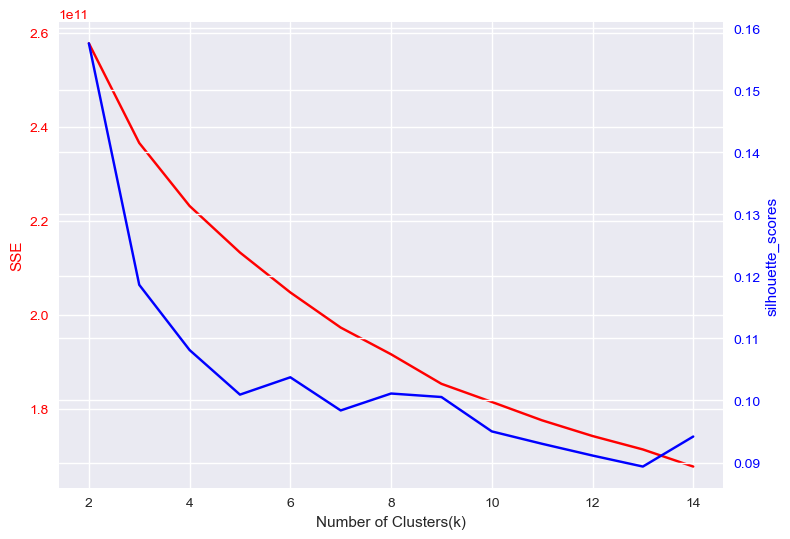

In [136]:
plot_elbow_curve_and_silhouette_scores(k[0], k[1])


In [137]:
def choose_optimal_clusters(silhouette_scores):
    optimal_k = silhouette_scores.index(max(silhouette_scores)) ++ 2
    print(f"Optimal number of clusters: {optimal_k}")

In [138]:
choose_optimal_clusters(k[1])

Optimal number of clusters: 2


In [139]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [140]:
pip install beautifulsoup4

In [141]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')  # Download necessary NLTK data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True